In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

##  Load and Explore Dataset

In [2]:
# Load dataset
df = pd.read_csv("J:\#Recommendation-System\Systems\Podcast_Recomendation_System\Podcast-Recomendation-System.csv")

In [3]:
# Display basic dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121175 entries, 0 to 121174
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uuid         121175 non-null  object
 1   title        121173 non-null  object
 2   image        121175 non-null  object
 3   description  119830 non-null  object
 4   language     121175 non-null  object
 5   categories   121175 non-null  object
 6   website      120005 non-null  object
 7   author       118678 non-null  object
 8   itunes_id    121175 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 8.3+ MB


In [4]:
df.head(3)

,uuid,title,image,description,language,categories,website,author,itunes_id
0,8d62d3880db2425b890b986e58aca393,"Ecommerce Conversations, by Practical Ecommerce",http://is4.mzstatic.com/image/thumb/Music6/v4/...,Listen in as the Practical Ecommerce editorial...,English,Technology,http://www.practicalecommerce.com,Practical Ecommerce,874457373
1,cbbefd691915468c90f87ab2f00473f9,Eat Sleep Code Podcast,http://is4.mzstatic.com/image/thumb/Music71/v4...,On the show we’ll be talking to passionate peo...,English,Tech News | Technology,http://developer.telerik.com/,Telerik,1015556393
2,73626ad1edb74dbb8112cd159bda86cf,SoundtrackAlley,http://is5.mzstatic.com/image/thumb/Music71/v4...,A podcast about soundtracks and movies from my...,English,Podcasting | Technology,https://soundtrackalley.podbean.com,Randy Andrews,1158188937


## Data Cleaning & Preprocessing

In [5]:
# Drop missing values in title and description
dataset = df.dropna(subset=["title", "description"]).copy()

In [6]:
# Convert language and categories to lowercase
dataset["language"] = dataset["language"].str.lower()
dataset["categories"] = dataset["categories"].str.lower()

In [7]:
# Remove unwanted characters from categorie
dataset["categories"] = dataset["categories"].str.replace(r"[|/&]", " ", regex=True)

In [8]:
# Convert categories into list format
dataset["categories"] = dataset["categories"].str.split()

## Data Visualization

C:\Users\vinay\AppData\Local\Temp\ipykernel_20460\3794155541.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")


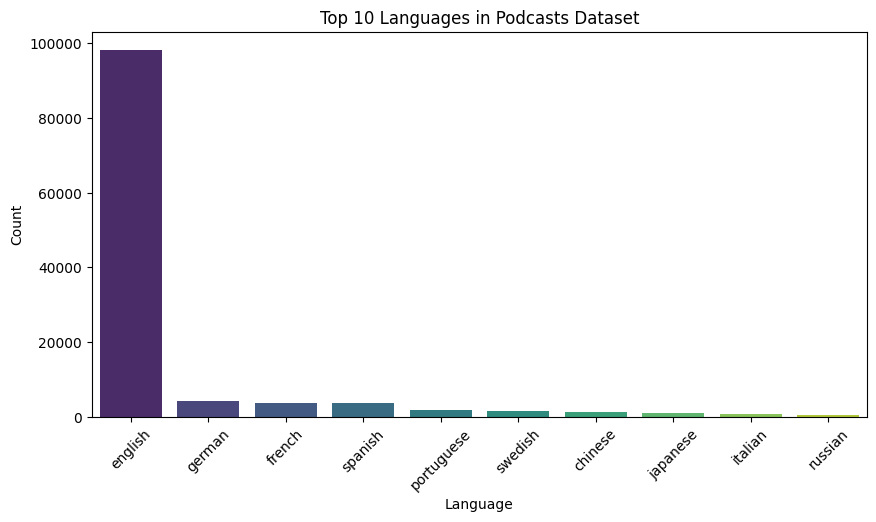

In [9]:
# Top 10 Languages in Dataset
plt.figure(figsize=(10, 5))
language_counts = dataset["language"].value_counts().head(10)
sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")
plt.title("Top 10 Languages in Podcasts Dataset")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [10]:
dataset['categories'].value_counts().head(20)

categories
[religion, spirituality, christianity]    9687
[christianity, religion, spirituality]    8173
[music]                                   7586
[comedy]                                  6298
[news, politics]                          5987
[society, culture]                        5971
[tv, film]                                4750
[sports, recreation]                      4070
[religion, spirituality]                  3286
[business]                                2277
[education]                               1622
[professional, sports, recreation]        1572
[sports, recreation, professional]        1408
[arts]                                    1244
[games, hobbies]                          1207
[health]                                   979
[technology]                               941
[video, games, games, hobbies]             740
[games, hobbies, video, games]             663
[kids, family]                             586
Name: count, dtype: int64

C:\Users\vinay\AppData\Local\Temp\ipykernel_20460\3204160900.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories_counts.values , y=categories_counts.index, palette="viridis",orient='h' )


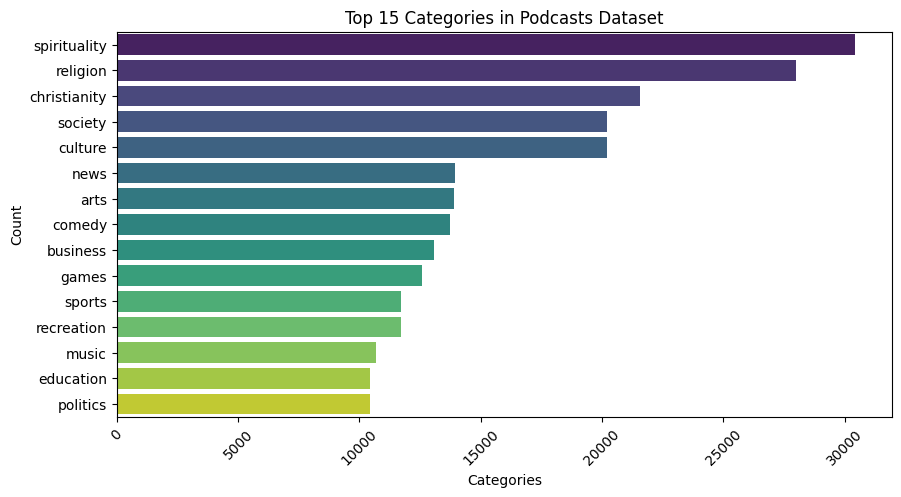

In [11]:
# Top 15 Categories in Dataset
plt.figure(figsize=(10, 5))

# Explode the categories list into individual rows
categories_exploded = dataset.explode('categories')

# Calculate value counts for the exploded categories
categories_counts = categories_exploded['categories'].value_counts().head(15)

# Plot the barplot
sns.barplot(x=categories_counts.values , y=categories_counts.index, palette="viridis",orient='h' )

plt.title("Top 15 Categories in Podcasts Dataset")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [12]:
dataset.to_csv("J:/#Recommendation-System/Systems/Podcast_Recomendation_System/cleaned_podcasts.csv", index=False)


## Feature Engineering & Model Training

In [13]:
## Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words="english", max_features=5000)
tfidf_matrix = tfidf.fit_transform(dataset["description"].fillna(""))

In [14]:
## Initialize Nearest Neighbors Model
nn_model = NearestNeighbors(n_neighbors=10, metric="cosine", algorithm="brute")
nn_model.fit(tfidf_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=10)

Now , what we will do

Recommend top N podcasts based on language and category using Nearest Neighbors.
    
Parameters:

- language (str): User's preferred language.
- category (str): Desired podcast category.
- top_n (int): Number of recommendations (default: 5).

Returns:

- List of recommended podcast details (title, image, description).

In [15]:
def recommend_podcasts(language: str, category: str, top_n=10):
    # Filter dataset by language
    filtered_data = dataset[dataset["language"] == language.lower()]

    # Further filter by category (podcasts that contain the category)
    filtered_data = filtered_data[filtered_data["categories"].apply(lambda x: category.lower() in x)]

    if filtered_data.empty:
        return f"No podcasts found for language '{language}' and category '{category}'."

    # Get indices of the filtered podcasts
    indices = filtered_data.index.tolist()

    # Find the nearest neighbors for the first podcast in the filtered list
    query_index = indices[0]  # Pick first matching podcast
    distances, neighbors = nn_model.kneighbors(tfidf_matrix[query_index], n_neighbors=top_n + 1)

    # Get recommended podcast details
    recommendations = []
    for idx in neighbors[0][1:]:  # Skip first one (it’s the same as query)
        recommendations.append({
            "title": dataset.iloc[idx]["title"],
            "image": dataset.iloc[idx]["image"],
            "description": dataset.iloc[idx]["description"]
        })

    return recommendations


In [16]:
# ## Example Usage
print("## Example Recommendations:")
recom = recommend_podcasts(language="english", category="technology", top_n=10)
recom

## Example Recommendations:


[{'title': 'Tudo sobre eCommerce',
  'image': 'http://is4.mzstatic.com/image/thumb/Music118/v4/13/17/bf/1317bf5c-d42e-1115-38dc-b667cb5dec80/source/600x600bb.jpg',
  'description': 'O acelerador de projetos de ecommerce em Portugal…'},
 {'title': 'eCommerce Evolution',
  'image': 'http://is3.mzstatic.com/image/thumb/Music122/v4/e4/f1/d0/e4f1d065-36f5-fdf5-5839-d4c9bc21225a/source/600x600bb.jpg',
  'description': "eCommerce Evolution is hosted by Brett Curry, CEO of OMG Commerce.  Tune in for fresh interviews with the merchants, vendors, and experts shaping the eCommerce industry.  We take an in-depth look at what's new and what's next in eCommerce."},
 {'title': 'Cha-Ching! - An eCommerce Podcast',
  'image': 'http://is3.mzstatic.com/image/thumb/Music128/v4/8e/87/5b/8e875bf5-c7f3-7e83-09f3-b368d8d714af/source/600x600bb.jpg',
  'description': "Cha-Ching! is an eCommerce podcast where host, Kevin Wild, interviews merchants, app developers, and thought leaders on their experiences and suc